Text(0.5,1,'Probability mass function fo a Posson random valiable, differing $\\lambda$ values')

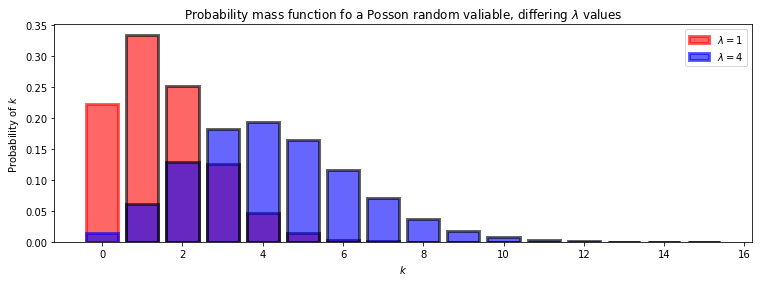

In [2]:
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
%matplotlib inline

figsize(12.5, 4)
poi = stats.poisson
lambda_ = [1.5, 4.25]

colors = ["red", "blue"]

#create Arithmetic progression
a = np.arange(16) 

#poisson.pmf(k) = exp(-mu) * mu**k / k! for k>0
#pmf: "probability mass function"
plt.bar(a, poi.pmf(a, lambda_[0]), color = colors[0], label = "$\lambda = %.1d$" % lambda_[0], alpha = 0.60,
        edgecolor=colors[0], lw = "3")
plt.bar(a, poi.pmf(a, lambda_[1]), color = colors[1], label = "$\lambda = %.1d$" % lambda_[1], alpha = 0.60,
        edgecolor=colors[1], lw = "3")

plt.legend()
plt.ylabel("Probability of $k$")
plt.xlabel("$k$")
plt.title("Probability mass function fo a Posson random valiable, differing $\lambda$ values")

Text(0.5,1,'Probability density funtion of an exponential randam valiable, differing $\\lambda$ values')

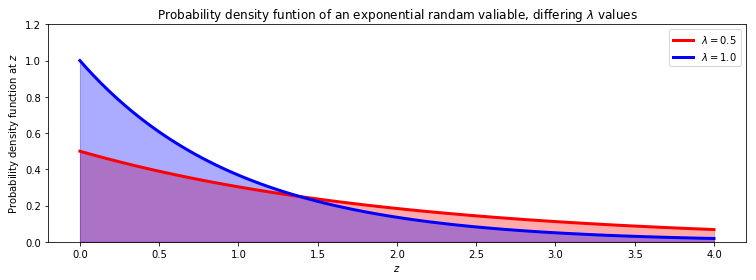

In [3]:
# create artithmetic progression, linspace(start, end, bin)
a = np.linspace(0, 4, 100)
expo = stats.expon
lambda_ = [0.5, 1]

for l, c in zip(lambda_, colors) :
    # 
    plt.plot(a, expo.pdf(a, scale = 1./l), lw=3, color=c, label = "$\lambda = %.1f$" % l)
    plt.fill_between(a, expo.pdf(a, scale = 1./l), color=c, alpha=.33)
    
plt.legend()
plt.ylabel("Probability density function at $z$")
plt.xlabel("$z$")
plt.ylim(0, 1.2)
plt.title("Probability density funtion of an exponential randam valiable, differing $\lambda$ values")

(0, 74)

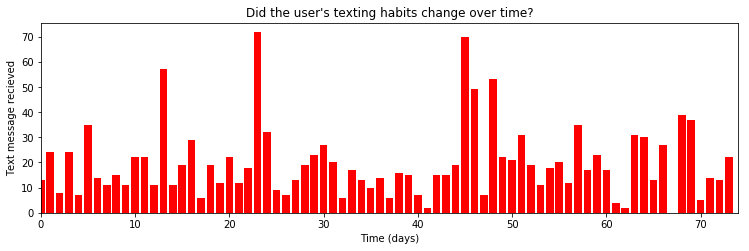

In [5]:
from os import makedirs

makedirs("data", exist_ok=True)

from urllib.request import urlretrieve

urlretrieve("https://git.io/vXTVC", "data/txtdata.csv")

figsize(12.5, 3.5)

count_data = np.loadtxt("data/txtdata.csv")
n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color = "red")

plt.xlabel("Time (days)")
plt.ylabel("Text message recieved")
plt.title("Did the user's texting habits change over time?")
plt.xlim(0, n_count_data)

In [6]:
import pymc as pm

alpha = 1.0 / count_data.mean()

lambda_1 = pm.Exponential("lambda_1", alpha)
lambda_2 = pm.Exponential("lambda_2", alpha)

tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data)

print("Random output:", tau.random(), tau.random(), tau.random())

Random output: 69 70 9


In [7]:
@pm.deterministic
def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
    out = np.zeros(n_count_data)
    out[:tau] = lambda_1
    out[tau:] = lambda_2
    return out

observation = pm.Poisson("obs", lambda_, value=count_data, observed=True)
model = pm.Model([observation, lambda_1, lambda_2, tau])

mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000)

 [-----------------100%-----------------] 40000 of 40000 complete in 5.9 sec

Text(0,0.5,'Probability')

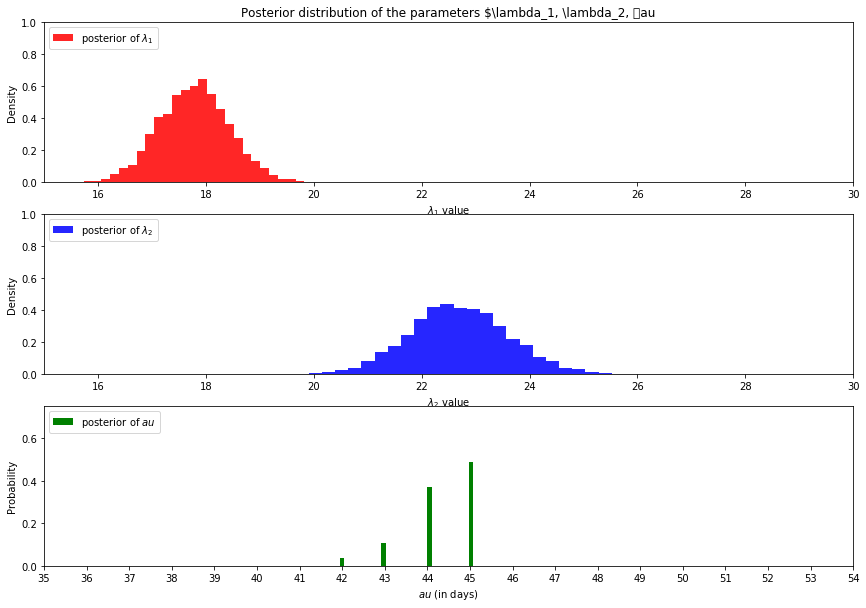

In [8]:
lambda_1_samples = mcmc.trace('lambda_1')[:]
lambda_2_samples = mcmc.trace('lambda_2')[:]
tau_samples = mcmc.trace('tau')[:]

figsize(14.5, 10)

ax = plt.subplot(311)
ax.set_autoscaley_on(False)
plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85, color="red", normed=True,
         label="posterior of $\lambda_1$")
plt.legend(loc="upper left")
plt.title("Posterior distribution of the parameters $\lambda_1, \lambda_2, \tau")
plt.xlim([15,30])
plt.xlabel("$\lambda_1$ value")
plt.ylabel("Density")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85, color="blue", normed=True,
         label="posterior of $\lambda_2$")
plt.legend(loc="upper left")
plt.xlim([15,30])
plt.xlabel("$\lambda_2$ value")
plt.ylabel("Density")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1, label="posterior of $\tau$", 
         color="green", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))
plt.legend(loc="upper left")
plt.ylim([0, 0.75])
plt.xlim([35, len(count_data) - 20])
plt.xlabel("$\tau$ (in days)")
plt.ylabel("Probability")

[ 17.78000107  17.78000107  17.78000107  17.78000107  17.78000107
  17.78000107  17.78000107  17.78000107  17.78000107  17.78000107
  17.78000107  17.78000107  17.78000107  17.78000107  17.78000107
  17.78000107  17.78000107  17.78000107  17.78000107  17.78000107
  17.78000107  17.78000107  17.78000107  17.78000107  17.78000107
  17.78000107  17.78000107  17.78000107  17.78000107  17.78000107
  17.78000107  17.78000107  17.78000107  17.78000107  17.78000107
  17.78000107  17.78000107  17.78000107  17.78000107  17.78000107
  17.78061118  17.78278074  17.93322935  18.43441054  20.26022824
  22.69522585  22.69569001  22.69569001  22.69587718  22.69587718
  22.69587718  22.69587718  22.69587718  22.69587718  22.69587718
  22.69587718  22.69587718  22.69587718  22.69587718  22.69587718
  22.69587718  22.69587718  22.69587718  22.69587718  22.69587718
  22.69587718  22.69587718  22.69587718  22.69587718  22.69587718
  22.69587718  22.69587718  22.69587718  22.69587718]


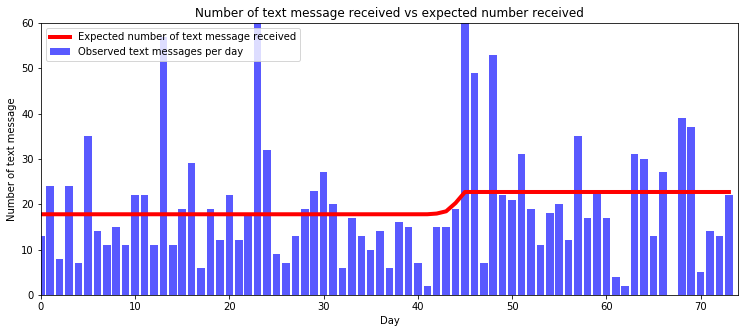

In [16]:
figsize(12.5, 5)
N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data)

for day in range(0, n_count_data):
    ix = day < tau_samples
    expected_texts_per_day[day] = (lambda_1_samples[ix].sum() + lambda_2_samples[~ix].sum()) / N
    
plt.plot(range(n_count_data), expected_texts_per_day, lw=4, color="red", label="Expected number of "
        "text message received")
plt.xlim(0, n_count_data)
plt.ylim(0, 60)
plt.xlabel("Day")
plt.ylabel("Number of text message")
plt.title("Number of text message received vs expected number received")
plt.bar(np.arange(len(count_data)), count_data, color="blue", alpha=0.65, 
        label="Observed text messages per day")
plt.legend(loc="upper left")

print(expected_texts_per_day)